In [10]:
def CF(c,m, T1, T2, T3):
    # 参数说明：
    # c：可交割债券的票面利率
    # m： 付息次数
    # T1：国债期货的最后交割日（datetime格式）
    # T2：最后交割日之后的下一个付息日
    # T3：最后到期日

    x = T2.month - T1.month #交割月至下一付息月的月份
    if x>=0:                #国债期货交割月 与 下一付息月 在同一年度
        x=x                 # 在不同年度
    else:
        x=12+x
    
    tenor = (T3 - T1).days / 365 #最后交割日的剩余期限

    import math

    # 如果时间差 < 0.5，则认为为最后一次付息
    if math.modf(tenor)[0] > 0.5: #小数部分大于0.5
        n = math.ceil(tenor) #交割日后剩余付息次数
    else:
        n = math.floor(tenor) 

    r = 0.03  
    
    A = 1 / pow(1 + r / m, x * m / 12)

    B = c/m+c/r+(1-c/r)/pow(1+r/m,n-1)
    
    D = c*(1-x*m/12)/m
    factor = A*B-D

    return factor


In [11]:
import datetime as dt
t1=dt.datetime(2021,9,15)
freq=1

t2_TB1828=dt.datetime(2021,12,6)
t3_TB1828=dt.datetime(2025,12,6)
C_TB1828=0.0322

CF_TB1828=CF(c=C_TB1828,m=freq, T1=t1,T2=t2_TB1828,T3=t3_TB1828)
print('2021年9月10日18附息国债28的转换因子',round(CF_TB1828,4))

2021年9月10日18附息国债28的转换因子 1.0066


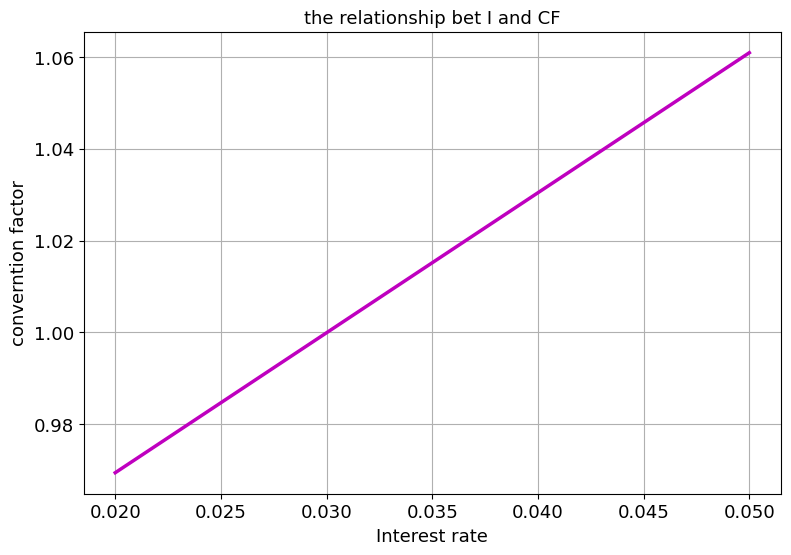

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# 创建18付息国债28票面利率的数组
C_list = np.linspace(0.02, 0.05, 200)
CF_list = CF(c=C_list, m=freq, T1=t1, T2=t2_TB1828, T3=t3_TB1828)
plt.figure(figsize=(9, 6))
plt.plot(C_list, CF_list, 'm-', lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Interest rate', fontsize=13)  # Removed 'u' prefix for Python 3
plt.yticks(fontsize=13)
plt.ylabel('converntion factor', fontsize=13)  # Removed 'u' prefix for Python 3
plt.title('the relationship bet I and CF', fontsize=13)  # Removed 'u' prefix for Python 3
plt.grid()
plt.show()